<a href="https://colab.research.google.com/github/fpm17006/Debasmita-Dey/blob/main/Quick_Commerce_25_04_24_without_ADV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Only negative Reviews.csv', encoding = " **ISO**-8859-1 " )
data


,id,text
0,1,"I have return the products, but still not yet received, last since 27 th jan, 102 rupe..."
1,2,I ordered some products on 20th January 2023. Out of that one item wasn't delivered. I...
2,3,Very bad quality products specially veggies and fruits. service is so bad.. They ask t...
3,4,"If we complain anything about things delivery, they will not sort out our problem.inst..."
4,5,Been a regular user of BB. But now there are major issues with payment . The payment g...
...,...,...
2043,2044,Hi folks.... Worst experience with bigbasket today I got a call from a store manager s...
2044,2045,"Iam a regular customer of bb daily, some thing smelled bad but i could not understand ..."
2045,2046,I got mangoes in over ripe condition. Requested for return. They are fixing the return...
2046,2047,But I have not received a call back.


In [23]:
from collections import Counter
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
#from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'(\\x(.){2})'
combined_pat = r'|'.join((pat1, pat2, pat3))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = data['text']
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result[0]

<ipython-input-24-99c4ffdbcb66>:9: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-24-99c4ffdbcb66>:9: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



'i have return the products but still not yet received last since th jan rupee cheated not given back amount'

In [25]:
from pandas import DataFrame
df = DataFrame (test_result,columns=['Clean Text'])
print (df)

                                                                                     Clean Text
0     i have return the products but still not yet received last since th jan rupee cheated ...
1     i ordered some products on th january out of that one item wasn t delivered i request ...
2     very bad quality products specially veggies and fruits service is so bad they ask to r...
3     if we complain anything about things delivery they will not sort out our problem inste...
4     been a regular user of bb but now there are major issues with payment the payment goes...
...                                                                                         ...
2043  hi folks worst experience with bigbasket today i got a call from a store manager stati...
2044  iam a regular customer of bb daily some thing smelled bad but i could not understand c...
2045  i got mangoes in over ripe condition requested for return they are fixing the return d...
2046                                    

In [26]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = test_result
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['have', 'return', 'the', 'products', 'but', 'still', 'not', 'yet', 'received', 'last', 'since', 'th', 'jan', 'rupee', 'cheated', 'not', 'given', 'back', 'amount']


In [27]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [28]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['bigbasket', 'blinkit', 'big', 'basket', 'also','bb','big basket','mouthshut','Mouthshut'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [29]:
#!pip install spacy
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ'])
print(data_lemmatized[:1])

[['product', 'last', 'amount']]


In [30]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [31]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 13,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=1000,
                                           per_word_topics=True)

In [32]:
#I removed the comments to make the bloc shorter
def format_topics_sentences(corpus, texts, ldamodel=None):
    data = []

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: x[1], reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break

    sent_topics_df = (
        pd.DataFrame(data, columns=[
            'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                .assign(Text= texts) # or use Text= pd.Series(text)
    )

    return sent_topics_df

In [33]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(13)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10,0.3275,"order, delivery, time, item, day, guy, slot, last, first, service","[product, last, amount]"
1,1,7,0.3044,"issue, amount, lot, many, food, refund, request, total, extra, condition","[product, item, request, refund, time, refund, useless, money, day, multiple, mail, up..."
2,2,6,0.4661,"customer, service, bad, care, order, app, pathetic, time, com, money","[bad, quality, product, fruit, bad, ask, revert, issue]"
3,3,9,0.3399,"fruit, fresh, price, weight, option, offer, charge, fish, fool, veggie","[thing, delivery, sort, problem, milk, veggie, fruit, customer, care, namesake, thast,..."
4,4,5,0.3385,"deliver, account, way, card, different, bag, mobile, list, unable, door","[regular, user, major, issue, payment, payment, straight, payment, successful, window,..."
5,5,6,0.4805,"customer, service, bad, care, order, app, pathetic, time, com, money","[bad, pathetic, experience, executive, soft, skill, fool, download, subscription]"
6,6,9,0.4916,"fruit, fresh, price, weight, option, offer, charge, fish, fool, veggie","[amount, delivery, charge, charge, day, delivery, charge, information, deduct, facing,..."
7,7,6,0.8462,"customer, service, bad, care, order, app, pathetic, time, com, money","[pathetic, service, pathetic, customer, support]"
8,8,10,0.3099,"order, delivery, time, item, day, guy, slot, last, first, service","[delivery, slot, fancy, message, delivery, customer, many, year, service, pathetic]"
9,9,5,0.3819,"deliver, account, way, card, different, bag, mobile, list, unable, door","[delivery, man, raju, deliver, food, door, frozen, stuff, sun, time, door, second, che..."


In [42]:
#df_dominant_topic.to_csv("All document_topic_classify_25_April_24_without_ADV.csv")

In [34]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 90

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
#sent_topics_sorteddf_mallet.head(20)

sent_topics_sorteddf_mallet.to_csv("Negative 13_25_April_24_without_ADV.csv")

In [35]:
sent_topics_sorteddf_mallet.head(13)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8846,"product, good, site, purchase, bad, fraud, bill, return, people, pay","[sweet, family, expire, product, bad, day, sweet]"
1,1,0.8846,"pm, milk, address, wrong, year, health, chicken, city, buy, piece","[chicken, leg, piece, greenish, dangerous, health, option]"
2,2,0.8681,"people, person, today, due, half, work, mail, free, item, credit","[harrassment, agony, panic, embarrasment, worth, orderin]"
3,3,0.8154,"payment, message, morning, email, order, team, able, home, cash, end","[wth, doorstep, hell, order]"
4,4,0.9385,"quality, vegetable, product, rotten, bad, packet, check, local, high, item","[rotten, stale, vegetable, rotten, dairy, product, rotten, frozen, product, poor, qual..."
5,5,0.8846,"deliver, account, way, card, different, bag, mobile, list, unable, door","[perceive, approach, absurd, trap, showing, unable, fulfill]"
6,6,0.8974,"customer, service, bad, care, order, app, pathetic, time, com, money","[bad, customer, service, bad, refund, amount, app, refund]"
7,7,0.8077,"issue, amount, lot, many, food, refund, request, total, extra, condition","[reader, filthy, food, item, bigabsket, fi, dog, bad, food]"
8,8,0.8681,"company, number, egg, review, old, thing, whole, much, need, brand","[company, company, company, company, company, company]"
9,9,0.8461,"fruit, fresh, price, weight, option, offer, charge, fish, fool, veggie","[fruit, fresh, mango, pomegranate, rot]"


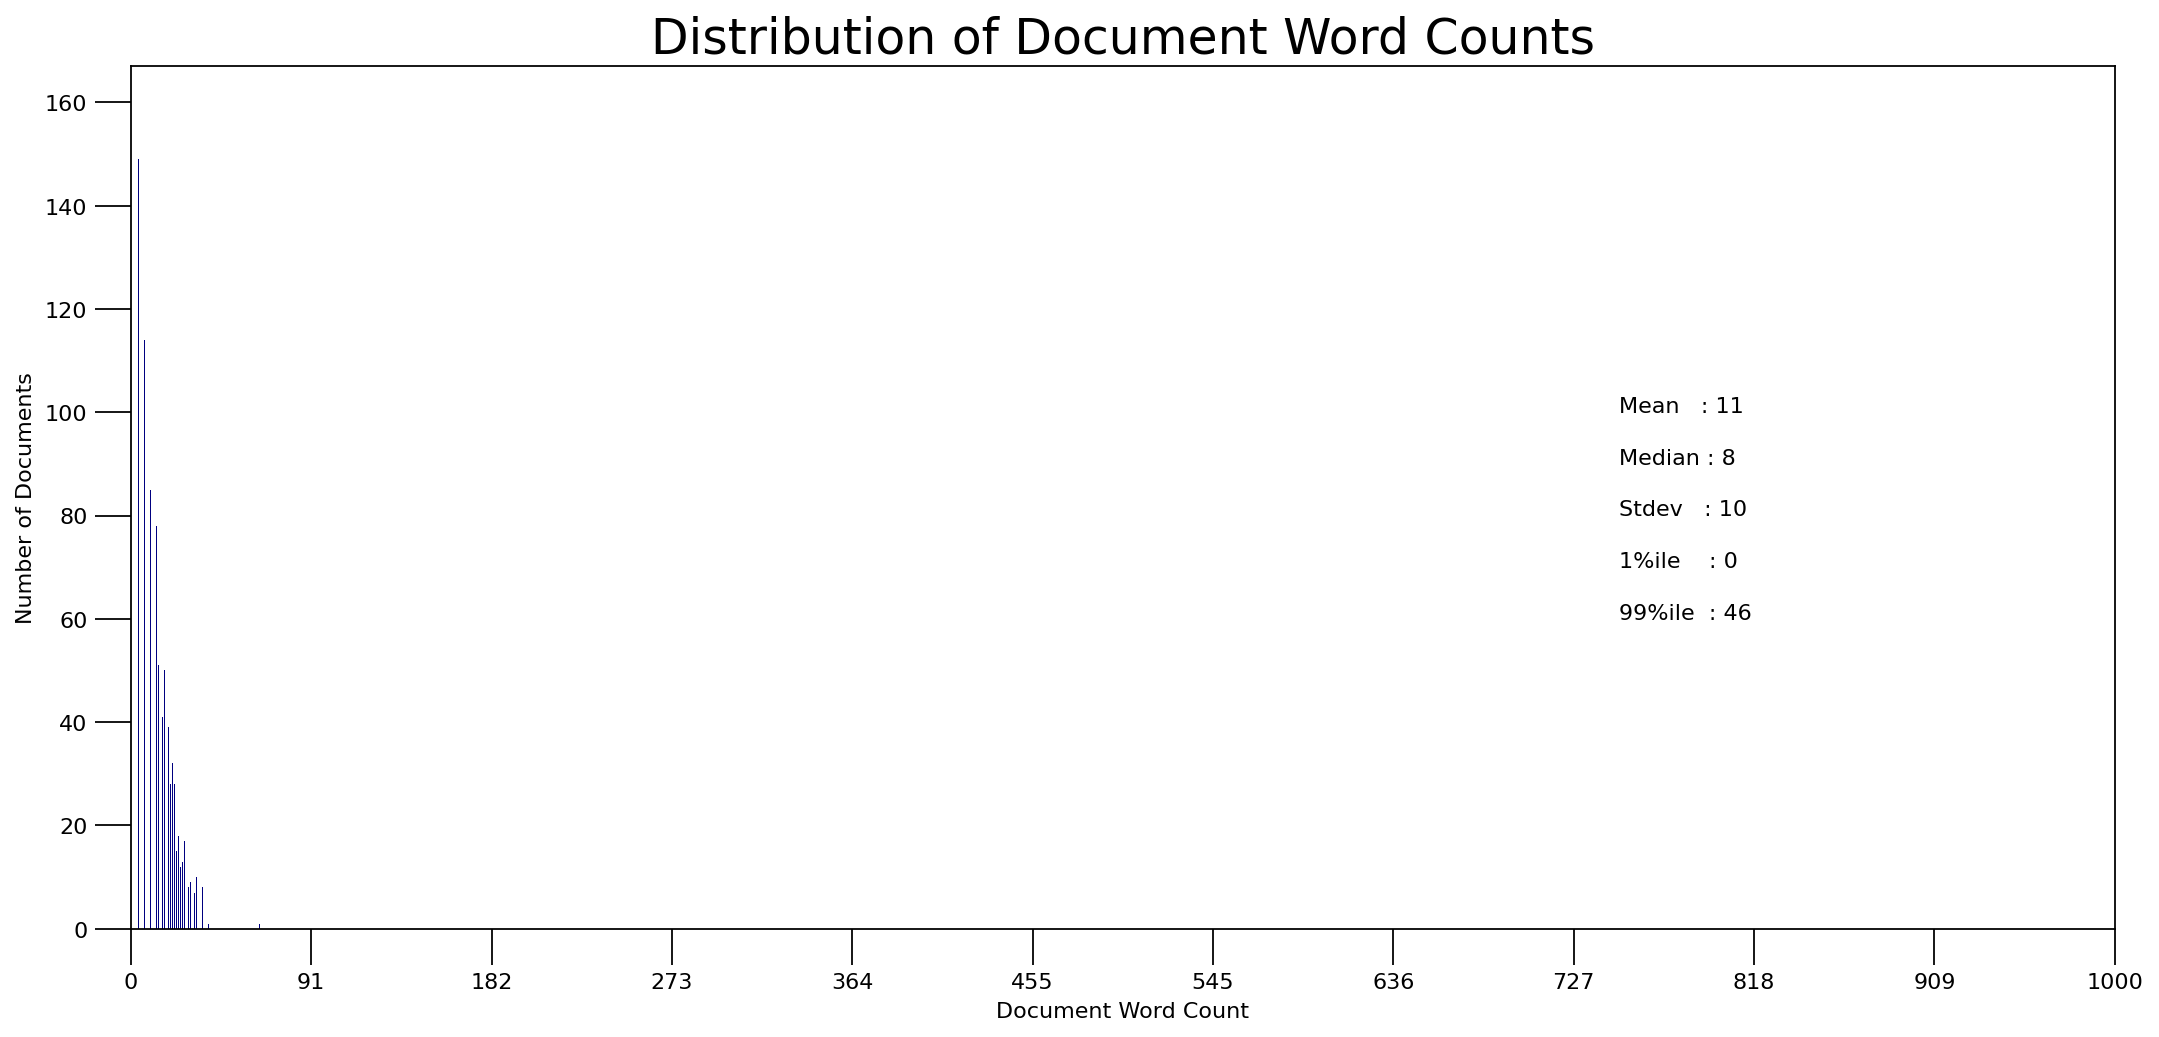

In [36]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 500, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,12))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [37]:
topics = lda_model.show_topics(num_topics=13, num_words=15, formatted=False)

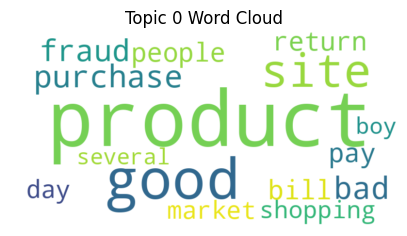

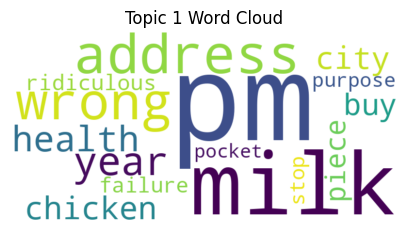

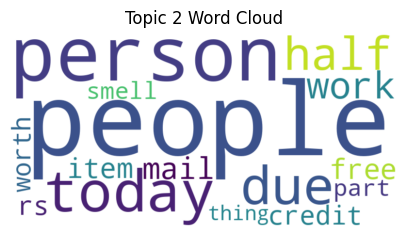

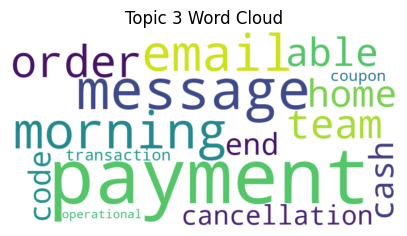

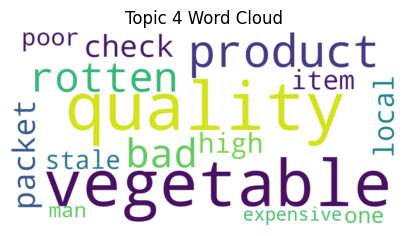

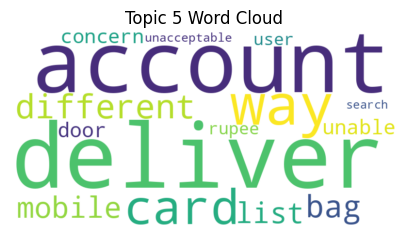

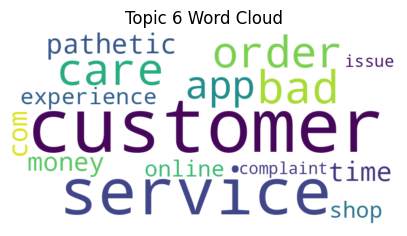

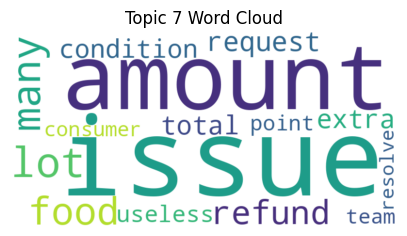

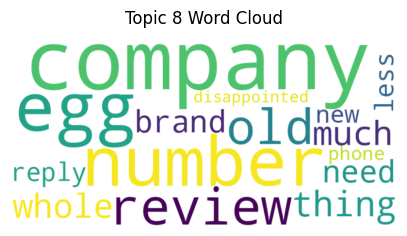

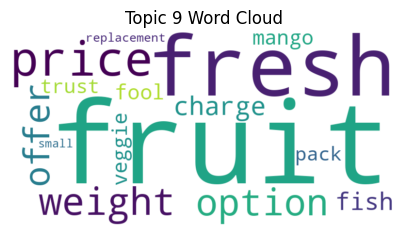

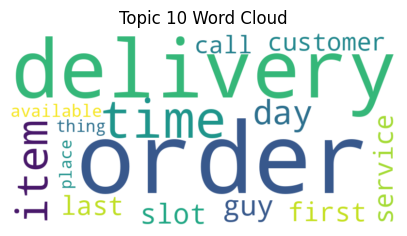

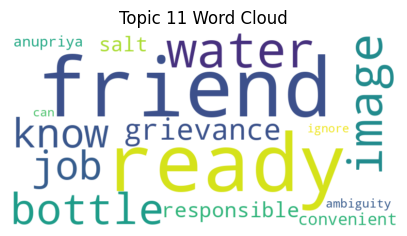

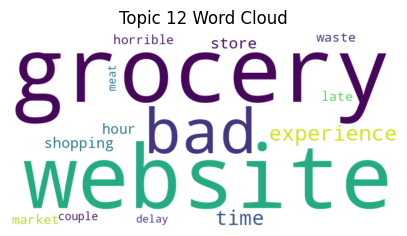

In [38]:
# Create a dictionary from the list of tuples
topics_dict = {topic: words_probs for topic, words_probs in topics}


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to generate word clouds
def generate_wordcloud(topic_words_probs, topic_number):
    wordcloud_dict = {word: prob for word, prob in topic_words_probs}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_number} Word Cloud")
    plt.axis('off')
    plt.savefig(f"/content/topic_{topic_number}_wordcloud_without_ADV.png", bbox_inches='tight')  # Save the image
    plt.show()

# Iterate over each topic and generate a word cloud
for topic, words_probs in topics_dict.items():
    generate_wordcloud(words_probs, topic)

In [39]:
from gensim.matutils import hellinger
from scipy import spatial as scs
from scipy.cluster import hierarchy as sch
from scipy.spatial.distance import pdist, squareform


# get topic distributions
topic_dist = lda_model.state.get_lambda()

# get topic terms
num_words = 15
topic_terms = [{w for (w, _) in lda_model.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]

# no. of terms to display in annotation
n_ann_terms = 15

# use hellinger distance metric in dendrogram
def js_dist(X):
    return pdist(X, lambda u, v: hellinger(u, v))

# define method for distance calculation in clusters
linkagefun=lambda x: sch.linkage(x, 'single')

# calculate text annotations
def text_annotation(topic_dist, topic_terms, n_ann_terms, linkagefun):
    # get dendrogram hierarchy data
    linkagefun = lambda x: sch.linkage(x, 'single')
    d = js_dist(topic_dist)
    Z = linkagefun(d)
    P = sch.dendrogram(Z, orientation="bottom", no_plot=True)

    # store topic no.(leaves) corresponding to the x-ticks in dendrogram
    x_ticks = np.arange(5, len(P['leaves']) * 10 + 5, 10)
    x_topic = dict(zip(P['leaves'], x_ticks))

    # store {topic no.:topic terms}
    topic_vals = dict()
    for key, val in x_topic.items():
        topic_vals[val] = (topic_terms[key], topic_terms[key])

    text_annotations = []
    # loop through every trace (scatter plot) in dendrogram
    for trace in P['icoord']:
        fst_topic = topic_vals[trace[0]]
        scnd_topic = topic_vals[trace[2]]

        # annotation for two ends of current trace
        pos_tokens_t1 = list(fst_topic[0])[:min(len(fst_topic[0]), n_ann_terms)]
        neg_tokens_t1 = list(fst_topic[1])[:min(len(fst_topic[1]), n_ann_terms)]

        pos_tokens_t4 = list(scnd_topic[0])[:min(len(scnd_topic[0]), n_ann_terms)]
        neg_tokens_t4 = list(scnd_topic[1])[:min(len(scnd_topic[1]), n_ann_terms)]

        t1 = "<br>".join((": ".join(("+++", str(pos_tokens_t1))), ": ".join(("---", str(neg_tokens_t1)))))
        t2 = t3 = ()
        t4 = "<br>".join((": ".join(("+++", str(pos_tokens_t4))), ": ".join(("---", str(neg_tokens_t4)))))

        # show topic terms in leaves
        if trace[0] in x_ticks:
            t1 = str(list(topic_vals[trace[0]][0])[:n_ann_terms])
        if trace[2] in x_ticks:
            t4 = str(list(topic_vals[trace[2]][0])[:n_ann_terms])

        text_annotations.append([t1, t2, t3, t4])

        # calculate intersecting/diff for upper level
        intersecting = fst_topic[0] & scnd_topic[0]
        different = fst_topic[0].symmetric_difference(scnd_topic[0])

        center = (trace[0] + trace[2]) / 2
        topic_vals[center] = (intersecting, different)

        # remove trace value after it is annotated
        topic_vals.pop(trace[0], None)
        topic_vals.pop(trace[2], None)

    return text_annotations

In [40]:
import plotly.figure_factory as ff
import plotly.offline as py
# get text annotations
annotation = text_annotation(topic_dist, topic_terms, n_ann_terms, linkagefun)

# Plot dendrogram
names = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10','Topic 11', 'Topic 12','Topic 13']
dendro = ff.create_dendrogram(topic_dist, distfun=js_dist, linkagefun=linkagefun, hovertext=annotation, orientation="bottom", labels=names)
dendro['layout'].update({'width': 1200, 'height': 600})
py.iplot(dendro)


In [41]:
file='/content/Dendrogram_Neg_without_ADV.png'
dendro.write_image(file)
